In [3]:
import matplotlib.pyplot as plt
import scipy.stats as st
import matplotlib as mpl
import seaborn as sb
import pandas as pd
import numpy as np


from matplotlib import animation, rc
#from IPython.display import HTML
%matplotlib inline
sb.set()

In [29]:
H0     = 0.7

Ocb    = 0.32
Ok     = 0.0
Omrad  = 0.0001
Ode    = 1 - Ocb - Ok
zvals  = np.linspace(0, 2.5, 300)

def hub(z, Ocb=0.32):
    #H**2/H0**2
    rhow = Ode
    return Omrad*(1+z)**4 + Ocb*(1+z)**3 +  Ok*(1+z)**2 + (1-Ocb)*rhow

In [30]:
all_z  = []
all_hz = []
all_Ocb= []
for i in np.linspace(0.1, 1, 10):
    all_Ocb.append(i)
    all_z.append(np.linspace(0, 2.5, 300))
    all_hz.append([100*H0*hub(z, i)**0.5 for z in zvals])

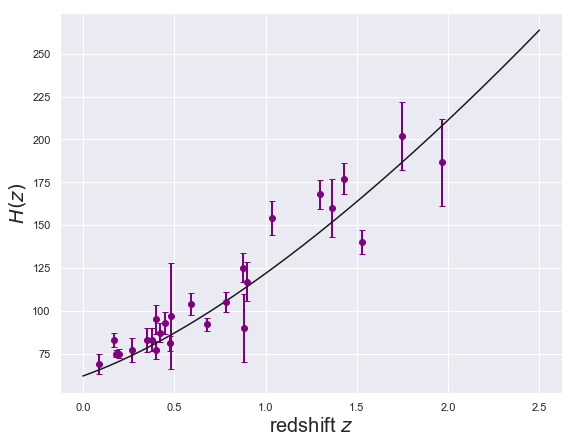

In [31]:
fig = plt.figure(figsize=(9,7))
ax1 = fig.add_subplot(111)
plt.plot(zvals, [100*H0*hub(z, 0.32)**0.5 for z in zvals], 'k-')


dataHz = np.loadtxt('Hz_all.dat')
redshifts, obs, errors = [dataHz[:,i] for i in [0,1,2]]
ax1.errorbar(redshifts, obs, errors/2., xerr=None,
    color='purple', marker='o', ls='None',
    elinewidth =2, capsize=3, capthick = 1)
ax1.legend(loc='lower right', frameon=False)
plt.ylabel('$H(z)$', fontsize=20)
plt.xlabel('redshift $z$', fontsize=20)
plt.show()

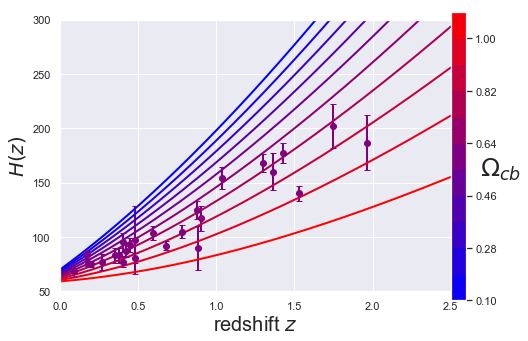

In [33]:
fig = plt.figure(figsize=(7.,5))
ax1 = fig.add_subplot(111)

a = np.array(all_Ocb)
min, max = (a.min(), a.max())
step     = (max-min)/len(a)

mymap    = mpl.colors.LinearSegmentedColormap.from_list('mycolors',['blue','red'])
Z        = [[0,0],[0,0]]
levels   = np.arange(min, max+step, step)
CS3      = plt.contourf(Z, levels, cmap=mymap)

all_data = zip(all_z, all_hz, all_Ocb)


for x,y,z in all_data:
    b = (float(z)-min)/(max-min)
    r,g = 1-b, 0
    ax1.plot(x,y,color=(r,g,b), lw=2.)
    
    
dataHz = np.loadtxt('Hz_all.dat')
redshifts, obs, errors = [dataHz[:,i] for i in [0,1,2]]
ax1.errorbar(redshifts, obs, errors/2., xerr=None,
    color='purple', marker='o', ls='None',
    elinewidth =2, capsize=3, capthick = 1)
ax1.legend(loc='lower right', frameon=False)
plt.ylabel('$H(z)$', fontsize=20)
plt.xlabel('redshift $z$', fontsize=20)
plt.axis((0, 2.5 , 50, 300))

cbaxes = fig.add_axes([0.9, 0.1, 0.03, 0.8])
cbar   = plt.colorbar(CS3, cax = cbaxes)
cbar.set_label('$\Omega_{cb}$', rotation=0, fontsize=25)
plt.grid()        
        
plt.show()

# Funcion de correlacion

In [4]:
# Ejercicio : leer datos

In [5]:
df =  pd.read_csv( .. )
df.head()

,r,xi,error
0,2.0,0.010298,0.000184
1,6.0,0.002726,0.000052
2,10.0,0.001441,0.000031
3,14.0,0.000831,0.000021
4,18.0,0.000514,0.000016


In [6]:
# Ejercicio 1: r**2*xi

df = df.set_index('r', drop=False)

In [7]:
...
df.head()

,r,xi,error,r2xi,r2error
r,,,,,
2.0,2.0,0.010298,0.000184,0.041191,0.000738
6.0,6.0,0.002726,0.000052,0.098139,0.001865
10.0,10.0,0.001441,0.000031,0.144063,0.003056
14.0,14.0,0.000831,0.000021,0.162789,0.004143
18.0,18.0,0.000514,0.000016,0.166543,0.005192


In [197]:
# Ejercicio 2: graficarlos

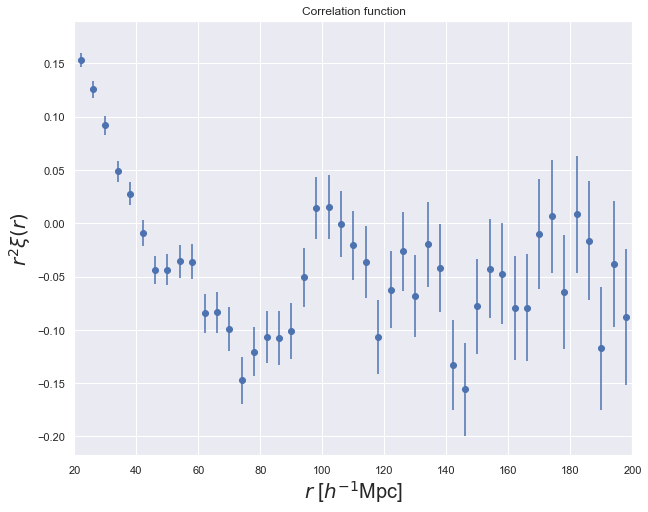

In [198]:
plt.figure(figsize=(10, 8))

plt.show()

# Covariance

error_bar**2 == covariance

In [199]:
# Ejercicio 3: Escribirla como matriz de 50 x 50 

In [8]:
covariance

array([[ 3.40098445e-08,  3.46819846e-09,  5.93667410e-10, ...,
        -9.01238459e-13, -1.70806758e-12, -7.52556157e-13],
       [ 3.46819846e-09,  2.68277433e-09,  7.98799284e-10, ...,
        -4.27019648e-13, -6.17998310e-13, -6.36622211e-13],
       [ 5.93667410e-10,  7.98799284e-10,  9.33827466e-10, ...,
        -2.66760654e-13, -3.89501082e-13, -4.88237409e-13],
       ...,
       [-9.01238459e-13, -4.27019648e-13, -2.66760654e-13, ...,
         2.58698341e-12,  1.12764667e-12,  3.33790752e-13],
       [-1.70806758e-12, -6.17998310e-13, -3.89501082e-13, ...,
         1.12764667e-12,  2.47978033e-12,  1.16512973e-12],
       [-7.52556157e-13, -6.36622211e-13, -4.88237409e-13, ...,
         3.33790752e-13,  1.16512973e-12,  2.64780398e-12]])

In [10]:
# Ejercicio 4: Graficarla

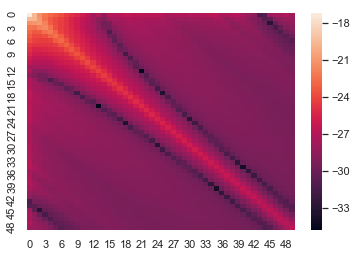

In [9]:
plt.show()

# The theory

### xi(r) = A*r^(-2) + polynomials(r) + Gaussian_for_BAO(alpha*r)

In [202]:
# Ejercicio 5: proponer una teoria para ajustarla
# -- guardar valores para despues comparar



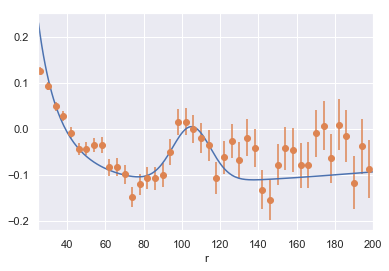

In [203]:
plt.figure()
r     = np.linspace(25, 200, 200)
sigma = 10
mu    = 105
A     = 3.

model =  d + b*r + c*r**(-2.) + A/(sigma*np.sqrt(2*np.pi))*np.exp(-(r - mu)**2/(2*sigma**2))

plt.plot(r, model)
df['r2xi'].plot(yerr=df['r2error'], xlim=[25, 200], fmt='o')

In [204]:
# Ejercicio 6: crear sus propios datos y darselos a su compañero 
# para identificar la teoria/modelo  -- solo con la gaussiana -- 

In [206]:
#dg = pd.DataFrame({'r':r, 'r2xi':function, 'r2error':error})
#dg.to_csv('new_dr14.csv', index=False)

# New data

In [11]:
# Ya sabemos que tiene un polinomio -0.18+ 0.0004*r + 250*r**(-2.)
# Solo queremos ajustar la gausiana

dq = pd.read_csv('new_dr14.csv',  sep=',')
...
dq.head(3)

,r,r2error,r2xi
r,,,
26.0,26.0,0.007621,0.194600
30.0,30.0,0.008811,0.105661
34.0,34.0,0.009856,0.076605


In [208]:
# Ejercicio 7: usando los nuevos datos graficarlos

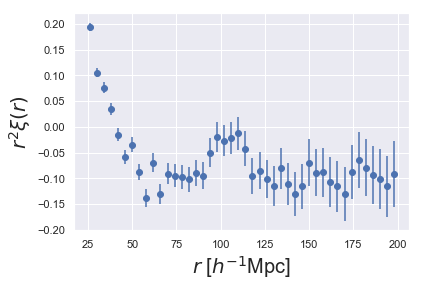

In [12]:
plt.figure()
...
plt.show()

In [13]:
# Ejercicio 8: Dadas las barras de error, calcular matriz de covarianza

In [15]:
...
covariance.head()

r,26.0,30.0,34.0,38.0,42.0,46.0,50.0,54.0,58.0,62.0,...,162.0,166.0,170.0,174.0,178.0,182.0,186.0,190.0,194.0,198.0
r,,,,,,,,,,,,,,,,,,,,,
26.0,0.000058,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
30.0,0.000000,0.000078,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
34.0,0.000000,0.000000,0.000097,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
38.0,0.000000,0.000000,0.000000,0.000123,0.000000,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
42.0,0.000000,0.000000,0.000000,0.000000,0.000152,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


# Fit the function

In [16]:
def poli(r):
    return -0.18+ 0.0004*r + 250*r**(-2.)

def xi(r, mu=105, sigma=10, A=2.5):
    return poli(r) + A/(sigma*np.sqrt(2*np.pi))*np.exp(-(r - mu)**2/(2*sigma**2))

# Cuales valores de A, mu y sigma ajustan mejor

## Only with mu

In [17]:
#Ejercicio 9: construit un likelihood 

In [18]:
def loglike(mu):
    ...
    return -chisquare/2

In [213]:
#Ejercicio 10: Calcular loglike para diferentes valores de mu y graficar

In [19]:
mu_values = np.arange(80., 150., 5.)
probable  = ...

Text(0.5,0,'$\\mu$')

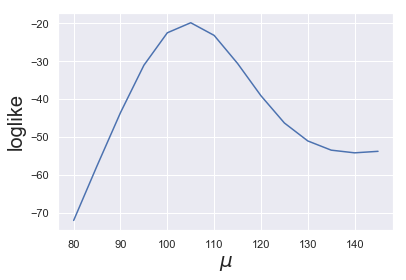

In [20]:
plt.plot(mu_values, probable)
plt.ylabel('loglike',fontsize=20)
plt.xlabel('$\mu$',  fontsize=20)

In [216]:
#np.shape(covariance)

## mu and sigma

In [217]:
# Ejercicio 11: Lo mismo pero para mu y sigma

In [21]:
def loglike(mu, sigma):
    ...
    return -chisquare/2

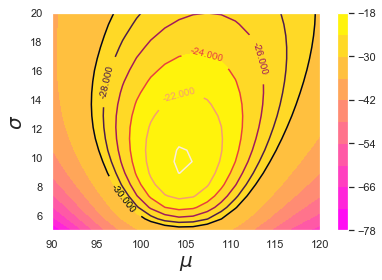

In [22]:
from matplotlib import ticker, cm

x = np.linspace(90, 120, 20)
y = np.linspace(5, 20, 20)

grid = [map(lambda p: loglike(p, sigma=i), x) for i in y]

fig, ax = plt.subplots()
gs = ax.contourf(x, y, grid, 10, cmap='spring')
cbar = fig.colorbar(gs)

CS = ax.contour(x, y, grid, np.arange(-30., -10, 2))
ax.clabel(CS, inline=10, fontsize=10)

plt.ylabel('$\sigma$',fontsize=20)
plt.xlabel('$\mu$',  fontsize=20)
plt.show()

# Tma de Bayes

$P(\theta|D, H)=\frac{P(D|\theta,H)P(\theta|H)}{P(D|H)}.$

$P(D|H)=\int d^N\theta P(D|\theta,H)P(\theta|H),$

# Numeros Aleatorios

##  Método del cuadrado central (1946 John von Neumann)

In [33]:
seed = 1982
y = seed**2 
y

3928324

In [34]:
# Ejercicio extra 12: separar los cuatro digitos

In [49]:
digits =  [int(i) for i in str(y)]
part   =  int(np.ceil(len(digits)/2.))
rdigits= digits[part-2: part+2]
rnumber= int(''.join(map(str, rdigits)))
rnumber

2832

In [ ]:
# Ejercicio extra 13: Escribirlo como funcion para que tome ese 
# numero como semilla

In [50]:
def ran_numbers(seed, num=1):
    random = []
    print ' -- random numbers out of {} -- '.format(seed)
    for i in np.arange(num):
        y = seed**2
        
        digits =  [int(i) for i in str(y)]
        part   =  int(np.ceil(len(digits)/2.))
        rdigits= digits[part-2: part+2]
        rnumber= int(''.join(map(str, rdigits)))
        
        seed = rnumber
        #print '(X_N)^2', y, '\t','X_{N+1}', rnumber
        random.append(seed)
    return random

In [58]:
random = ran_numbers(1981, 100)
random[:10]


 -- random numbers out of 1981 -- 


[2436, 3409, 6212, 5889, 6803, 2808, 8486, 121, 4641, 5388]

In [27]:
# Ejercicio 14: que pasa con el numero inicial cuando elijo 100
# Ejercicio 15: que pasa con el numero inicial 3792

In [219]:
#Ejercicio extra 16
# que pasa con el numero inicial cuando elijo 100
# que pasa con el numero inicial 3792

In [28]:
# Ejercicio 17 : Graficar numero aleatorios

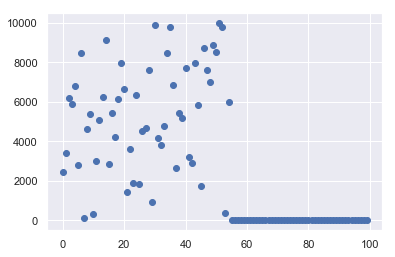

In [59]:
plt.plot(random, 'o')

## Generador congruencial multiplicativo
          

$x_n = a x_{n-1}$ mod  m

In [60]:
seed   = 20
random = []
for i in np.arange(100):
    y = (7*seed + 3) % 97
    seed = y
    random.append(y)

In [220]:
# Ejercicio 18: que pasa con 1000 in range
# Graficar

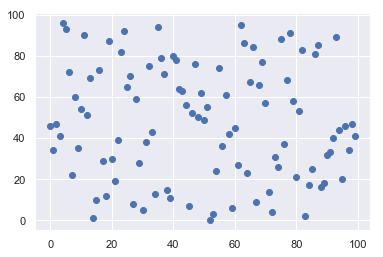

In [61]:
plt.plot( random , 'o')

Scipy random numbers

## https://docs.scipy.org/doc/numpy/reference/routines.random.html

## https://docs.scipy.org/doc/scipy/reference/stats.html

## The probability density function of the uniform distribution is

$p(x) = \frac{1}{b - a}$

mean = $\frac{1}{2}(a+b)$

In [70]:
xx = 1000

x = np.linspace(0,1, xx)
s = np.random.uniform(0,1,xx)

In [71]:
# Ejercicio 19: graficar puntos con distribucion uniforme

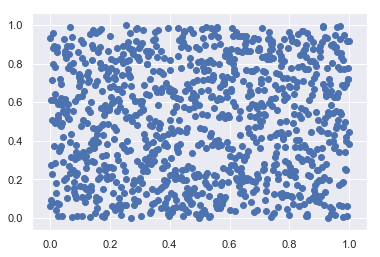

In [72]:
plt.scatter(x, s )

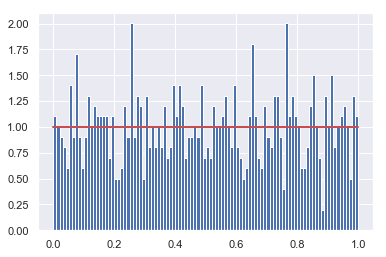

In [98]:
count, bins, ignored = plt.hist(s, 100, density=True)
plt.plot(bins, np.ones_like(bins), linewidth=2, color='r')

## The probability density for the Gaussian distribution is

$p(x) = \frac{1}{\sqrt{ 2 \pi \sigma^2 }} e^{ - \frac{ (x - \mu)^2 } {2 \sigma^2} }$


In [89]:
mu, sigma = 1, 0.8 # mean and standard deviation
s = np.random.normal(mu, sigma, 1000)

In [90]:
# Ejercicio 20: graficar puntos con distribucion gausiana

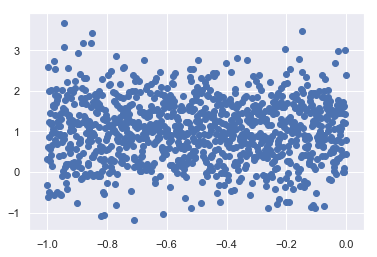

In [91]:
x = np.linspace(-1,0, 1000)
plt.scatter(x,s)

In [86]:
#Ejercicio 21: graficar gausiana

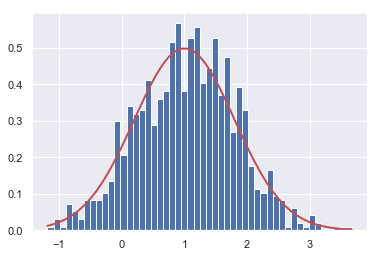

In [92]:
count, bins, ignored = plt.hist(s, 50, density=True)
plt.plot(bins, 1./(sigma*np.sqrt(2*np.pi))*np.exp(-(bins - mu)**2/(2*sigma**2)),
        linewidth=2, color='r')

## From Scipy

In [94]:
from scipy.stats import norm

In [95]:
#Ejercicio 21: calcular mean, var, kurtosis, skewness

In [96]:
mean, var, skew, kurt  = norm.stats(moments='mvsk')
mean, var, skew, kurt

(array(0.), array(1.), array(0.), array(0.))

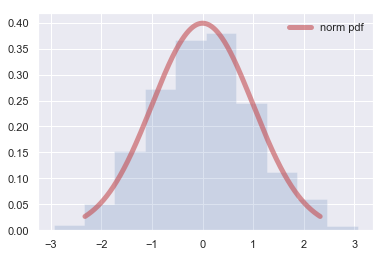

In [118]:
fig, ax = plt.subplots(1, 1)

x = np.linspace(norm.ppf(0.01), norm.ppf(0.99), 1000)
ax.plot(x, norm.pdf(x), 'r-', lw=5, alpha=0.6, label='norm pdf')
r = norm.rvs(size=1000)
ax.hist(r, density=True, histtype='stepfilled', alpha=0.2)
ax.legend(loc='best', frameon=False)
plt.show()

## Other distribution

$f(x, k) = \frac{1}{2^{k/2}\Gamma(k/2)} x^{k/2-1} e^{-x/2}$

k - degrees of freedom

df=3 - Maxwell

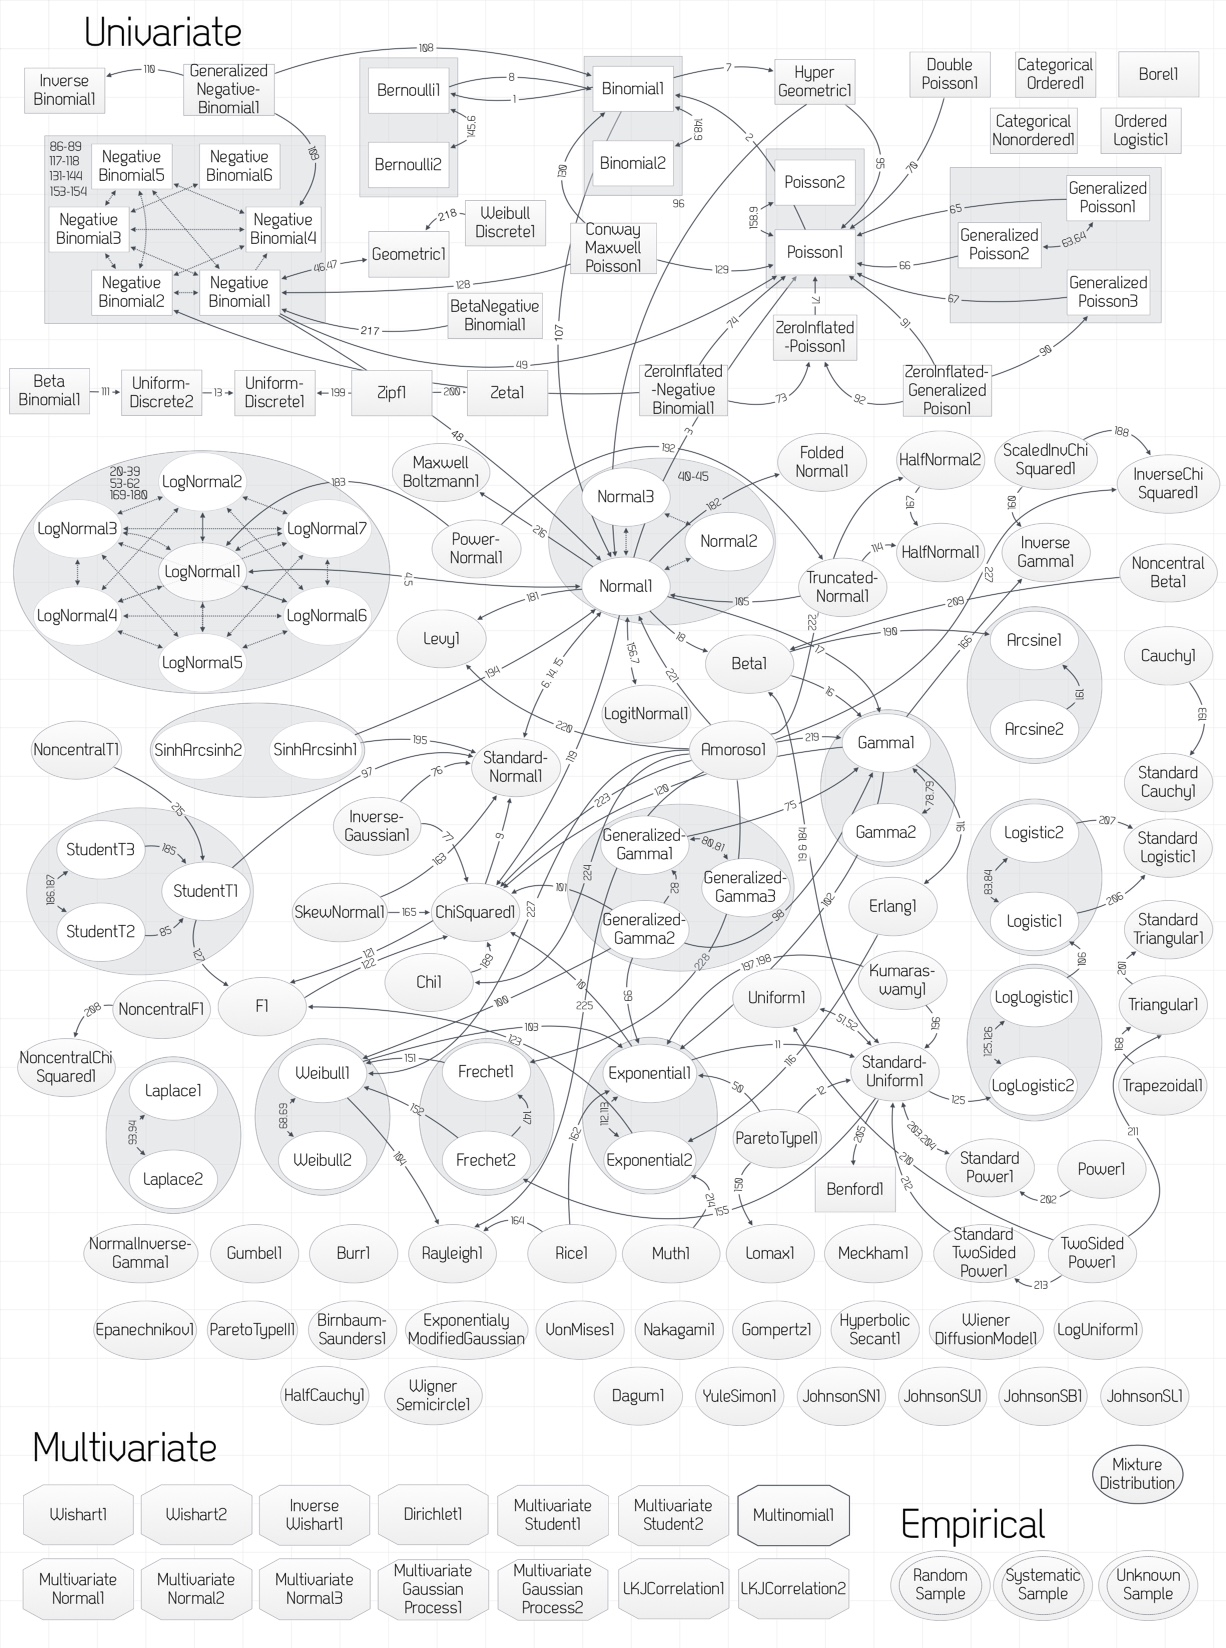

In [120]:
from IPython.display import Image
Image(filename='distributions.jpg')

## Método MC de acierto o fallo

### Usando Sumas de Riemann
https://github.com/neorelativista/IntroMCMC/blob/master/SumasRiemannGrandesNumeros.ipynb

In [97]:
def test_function(x):
    return(np.sqrt(np.arctan(x)))

In [ ]:
#Ejercicio : graficar funcion

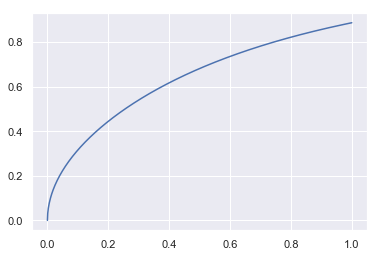

In [98]:
X = np.linspace(0,1,1000)
plt.plot( X, test_function(X) )
plt.grid(True)

El área bajo la curva de una función acotada en una región rectangular, $0 \leq g(x) \leq c$.  

Generar puntos aleatorios sobre dicho rectángulo; luego, la probabilidad de acertar a la región bajo la función es:

$\mathit{p}=\frac{\int_a^b g(x)dx}{c(b-a)}=\frac{\mathit{I}}{c(b-a)}$

El parámetro $\mathit{p}$ puede ser estimado de:

$\mathit{\hat{p}}=\frac{n_a}{n}$

In [225]:
#Ejercicio : calcular integral y graficar puntos

Integral = 0.6416


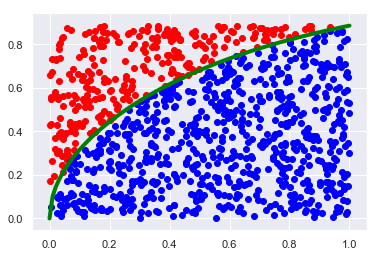

In [99]:
def integrate(x1, x2, func=test_function, n=1000):
    y1 = 0
    y2 = np.max(func(X))
    area  = (x2 - x1)*(y2 - y1)
    
    check = []
    xs    = []
    ys    = []
    for i in np.arange(n):
        x = np.random.uniform(x1, x2, 1)
        xs.append(x)
        y = np.random.uniform(y1, y2, 1)
        ys.append(y)
        if abs(y)>abs(func(x)) or y<0:
            check.append(0)
        else:
            check.append(1)

    integral = np.mean(check)*area
    print('Integral = {0:.4f}'.format(integral))
    return(xs, ys, check)


x, y, c = integrate(0, 1, n = 1000)
df = pd.DataFrame({'x':x, 'y':y, 'c':c})

plt.scatter(df[df['c']==0]['x'], df[df['c']==0]['y'], color='red')
plt.scatter(df[df['c']==1]['x'], df[df['c']==1]['y'], color='blue')

X = np.linspace(0, 1, 100)
plt.plot(X, test_function(X), lw=4, c='green')
plt.grid(True)

## Or animated

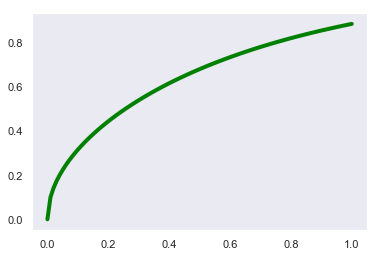

In [100]:

fig, ax        = plt.subplots()
xdata,  ydata  = [], []
xdata2, ydata2 = [], []

x    = np.linspace(0, 1, 100)
maxy = test_function(1.0)

ln,  = plt.plot([], [], 'ro')
ln2, = plt.plot([], [], 'go')
ln3, = plt.plot(x , test_function(x), lw=4, c='green')

title = ax.text(0.5, 1.05, "", bbox={'facecolor':'w', 'alpha':0.5, 'pad':5},
                  transform=ax.transAxes, ha="center")
plt.grid()
pad = 0.05


def init():
    ax.set_xlim(-pad, 1 + pad)
    ax.set_ylim(-pad, maxy + pad)
    return ln,

def update(frame):
    x = np.random.uniform(0, 1,    1)
    y = np.random.uniform(0, maxy, 1)
    if abs(y) > abs(test_function(x)):
        xdata.append(x)
        ydata.append(y)
        ln.set_data(xdata, ydata)
    else:
        xdata2.append(x)
        ydata2.append(y)
        ln2.set_data(xdata2, ydata2)
    title.set_text('{0:.4f}'.format(len(ydata2)*maxy/(len(ydata)+len(ydata2))))
    return ln, ln2, title

ani = animation.FuncAnimation(fig, update, frames=np.linspace(0, 1, 300),
                     init_func=init, blit=True)


In [102]:
rc('animation', html='html5')
HTML(ani.to_html5_video())

NameError: name 'HTML' is not defined

# MCMC

$L(D|\theta)=L(D|\theta_0)\exp \left[-\frac{1}{2}(\theta_i-\theta_{0i})H_{ij}(\theta_j-\theta_{0j})\right]$

$L=L_0e^{-\chi^2/2}$

In [105]:
def loglike(params):  
    mu    = params[0]
    
    delta = xi(dq['r'], mu) -  dq['r2xi']
    chisquare = np.dot(delta, np.dot(np.linalg.inv(covariance), delta))
    return -chisquare/2

In [106]:
#se define funcion objetivo
def target(lik, prior, theta):
    #prior by hand
    if theta < 90 or theta >120:
        return -1.0E50
    else:
        return lik([theta])
    #return lik(param[0], theta).pmf(param[1])*prior.pdf(theta)

In [107]:
#Ejercicio : construir un metropolis, paso a paso

In [119]:
def metropolissampler(niters, lik, prior, theta,  sigma):
    accepted = 0
    samples  = []
    likeli   = []
    
    samples.append(theta)
    likeli.append(target(lik, prior, theta))
    
    for i in range(niters):
        theta_p     = theta + sigma*np.random.normal(0., 1., 1)
        likeliratio = np.exp(target(lik, prior, theta_p) - \
                             target(lik, prior, theta))
        rho = np.minimum(1 , likeliratio)
        if rho > np.random.uniform():
            theta     = theta_p
            accepted += 1
            
        samples.append(theta)
        likeli.append(target(lik, prior, theta))    
    
    print 'Aceptance rate', 1.0*accepted/niters
    return samples, likeli

   

In [117]:
# Ejercicio : checar convergencia con diferentes sigma/theta, graficar

Aceptance rate 0.63


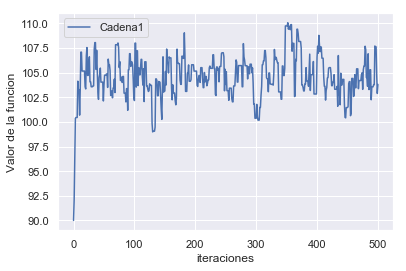

In [120]:
niters = 500
lik    = loglike
prior  = st.uniform(1)
theta  = 90.
sigma  = 3.

cadenas = []
nchains = 1

for i in range(nchains):
    cadenas.append(metropolissampler(niters, lik, prior, theta,  sigma))
    plt.plot(cadenas[i][0], '-', label='Cadena'+str(i+1))
    
plt.xlabel("iteraciones")
plt.ylabel("Valor de la funcion")
plt.legend()
plt.show()

#burn-in/thinning

(97, 110)

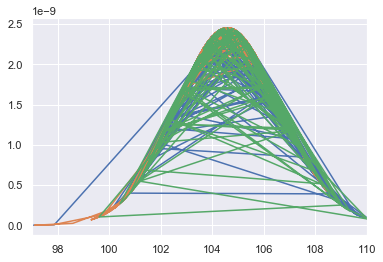

In [139]:
for i in range(nchains):
    plt.plot(cadenas[i][0], np.exp(cadenas[i][1]))
plt.xlim(97, 110)

# 2 params

In [29]:
#Ejercicio : construir likelihood para dos parametros

In [145]:
def loglike(params):  
    ...
    return -chisquare/2

In [146]:
#se define funcion objetivo
def target(lik, prior, theta):
    #prior by hand
    #if theta[0] < 90 or theta[0] >120:
    #    return -1.0E50
    #else:
    return lik(theta)
    #return lik(param[0], theta).pmf(param[1])*prior.pdf(theta)

In [147]:
def metropolissampler(niters, lik, prior, theta,  sigma):
    accepted = 0
    samples  = [] 
    likeli   = []
    
    samples.append(theta)
    likeli.append(target(lik, prior, theta))
    
    for i in range(niters):
        theta_p = theta + sigma* np.random.normal(0.,1., len(theta)) 
        likeratio=np.exp(target(lik, prior, theta_p) - \
                            target(lik, prior, theta))        
        rho = np.minimum(1, likeratio)
        
        if rho > np.random.uniform():
            theta = theta_p
            accepted += 1
        samples.append(theta)
        likeli.append(target(lik, prior, theta))
    print 'Aceptance rate', 1.0*accepted/niters
    return samples


In [30]:
# Graficar para dos parametros

Aceptance rate 0.384
Aceptance rate 0.45
Aceptance rate 0.176


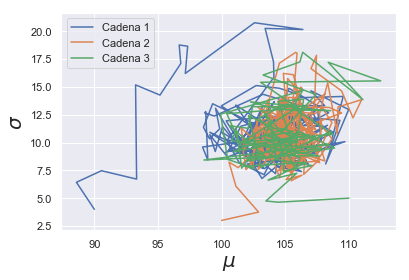

In [148]:
lik    = loglike
sigma  = [[3., 3] , [1, 4], [10, 2]]
theta  = [[90., 4], [100, 3], [110., 5]] # guess for mu, sigma
niters = 500
prior  = st.uniform(1)

nchains = 3
cadenas = []


    ....
    
plt.ylabel('$\sigma$',fontsize=20)
plt.xlabel('$\mu$',  fontsize=20)
plt.legend()
plt.show()

# Convergencia

In [149]:
cadenas = np.array(cadenas)

In [181]:
# Calcular convergencia
n = cadenas[0].shape[0]

W = (cadenas[0].std()**2 + cadenas[1].std()**2)/2
...

B = n * ((mean1 - mean)**2 + (mean2 - mean)**2)
var_theta = (1 - 1./n) * W + 1./n*B


print("Gelman-Rubin Diagnostic: ", 1 - np.sqrt(var_theta/W))

('Gelman-Rubin Diagnostic: ', 0.000997263408850424)


In [31]:
# Solo util para guardar datos

In [121]:
def metropolissampler2(niters, lik, prior, theta,  sigma):
    accepted = 0
    repeated = 1
    data     = []

    tmp= [target(lik, prior, theta)]
    tmp.extend(theta)
    tmp.extend([repeated])
    data.append(tmp)

    for i in range(niters):
        theta_p  = theta + sigma* np.random.normal(0.,1., len(theta)) 
        likeratio=np.exp(target(lik, prior, theta_p) - \
                            target(lik, prior, theta))        
        rho = np.minimum(1, likeratio)
        
        if rho > np.random.uniform():
            theta = theta_p
            accepted += 1
            repeated = 1
        else:
            repeated += 1
            
        tmp= [target(lik, prior, theta)]
        tmp.extend(theta)
        tmp.extend([repeated])
        data.append(tmp)

    print 'Aceptance rate', 1.0*accepted/niters
    return data

In [122]:
lik    = loglike
sigma  = [[3., 3] , [1, 4], [10, 2]]
theta  = [[90., 4], [100, 3], [110., 5]] 
niters = 500

nchains = 3


for i in range(nchains):
    tmp= metropolissampler2(niters, lik, prior, theta[i], sigma[i])
    df = pd.DataFrame(tmp)
    df.to_csv('cadenas_{}.txt'.format(i+1), header=None, index=None, sep='\t')

ValueError: The truth value of an array with more than one element is ambiguous. Use a.any() or a.all()

## Mean and std

In [228]:
# Ejercicio : graficar mean and var de las cadenas

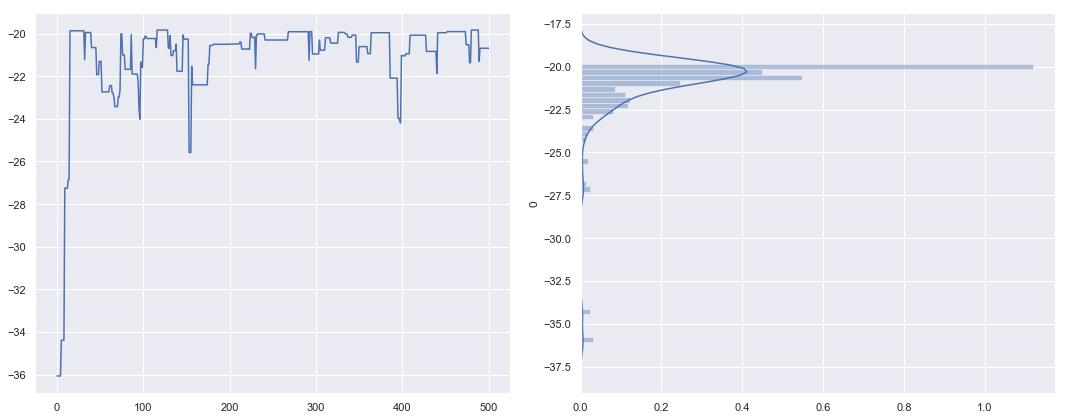

In [157]:
plt.figure(figsize=(15,6))
plt.subplot(121)
...
plt.subplot(122)
...
plt.tight_layout()

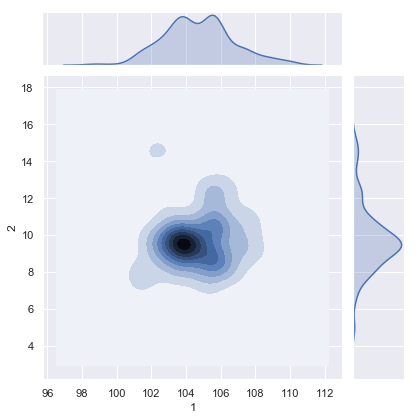

In [158]:
sb.jointplot(... , kind='kde')

In [178]:
df.describe()

,r,xi,error,r2xi,r2error
count,50.000000,5.000000e+01,50.000000,50.000000,50.000000
mean,100.000000,3.238869e-04,0.000009,-0.025947,0.029910
std,58.309519,1.507873e-03,0.000027,0.081238,0.017878
min,2.000000,-2.693663e-05,0.000002,-0.155735,0.000738
25%,51.000000,-7.564151e-06,0.000002,-0.082604,0.014875
50%,100.000000,-2.213502e-06,0.000003,-0.040096,0.029310
75%,149.000000,2.439069e-07,0.000006,0.007926,0.044447
max,198.000000,1.029770e-02,0.000184,0.166543,0.063793


In [160]:
np.cov(df[1], df[2])

array([[ 3.97039732, -0.24934808],
       [-0.24934808,  3.58817227]])

## Ellipses

In [163]:
def confidence_ellipse(x, y, ax, n_std=3.0, facecolor='none', **kwargs):
   
    if x.size != y.size:
        raise ValueError("x and y must be the same size")

    cov = np.cov(x, y)
    pearson = cov[0, 1]/np.sqrt(cov[0, 0] * cov[1, 1])
    # Using a special case to obtain the eigenvalues of this
    # two-dimensionl dataset.
    ell_radius_x = np.sqrt(1 + pearson)
    ell_radius_y = np.sqrt(1 - pearson)
    ellipse = Ellipse((0, 0),
        width=ell_radius_x * 2,
        height=ell_radius_y * 2,
        facecolor=facecolor,
        **kwargs)

    # Calculating the stdandard deviation of x from
    # the squareroot of the variance and multiplying
    # with the given number of standard deviations.
    scale_x = np.sqrt(cov[0, 0]) * n_std
    mean_x = np.mean(x)

    # calculating the stdandard deviation of y ...
    scale_y = np.sqrt(cov[1, 1]) * n_std
    mean_y = np.mean(y)

    transf = transforms.Affine2D() \
        .rotate_deg(45) \
        .scale(scale_x, scale_y) \
        .translate(mean_x, mean_y)

    ellipse.set_transform(transf + ax.transData)
    return ax.add_patch(ellipse)

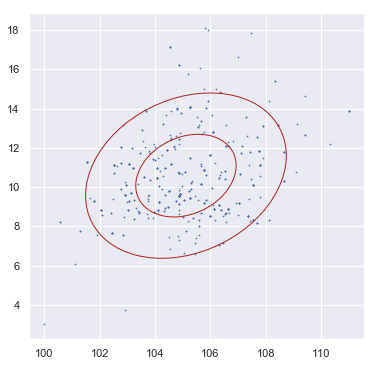

In [180]:
from matplotlib.patches import Ellipse
import matplotlib.transforms as transforms
fig, ax_nstd = plt.subplots(figsize=(6, 6))
x = np.array(zip(*cadenas[1])[0])
y= np.array(zip(*cadenas[1])[1])
ax_nstd.scatter(x, y, s=0.5)
confidence_ellipse(x, y, ax_nstd, n_std=1,  label=r'$1\sigma$', edgecolor='firebrick')
confidence_ellipse(x, y, ax_nstd, n_std=2,  label=r'$1\sigma$', edgecolor='firebrick')